<a href="https://colab.research.google.com/github/martydom/why-do-customer-churn/blob/main/Devashish_Bose_Team_1_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

**"The telecom industry reaches into every corner of our economies, societies, and private lives, and it is one of the greatest drivers of economic growth and human equality the world has ever seen.**"<br> 

Rightly quoted by Borje Ekholm, the CEO of Ericcson,a Swedish multinational networking and telecommunications company.<br>

Traditional telephone calls continue to be the industry's biggest revenue generator, but thanks to advances in network technology, telecom today is less about voice and increasingly about text (messaging, email) and images (e.g. video streaming). High-speed internet access for computer-based data applications such as broadband information services and interactive entertainment, is pervasive.<br>

But it isn't the case now.Due to many emerging telecom beasts, the competition in the telecom sector has increased tremendously. Customers can choose from a wide range of service providers and hence there are high chances of customers to discontinue the service of the existing service providers. This is referred to as Churn in the telecom industry. Thus, it directly impacts to revenue contribution of a company. Which makes it more important to keep the customers satisfied with the services. Also according to some experts, It is less costly to retain a customer than to acquire entirely new customers. Hence, it is essential for a company to focus on providing offers and good services.

So, without deep diving into all the boring talks, let me just lighten some of Orange SA's burden by identifying and resolving their issue related to Customer Churn.

So, let's discuss what steps we are going to follow to know more about Mr. Churn:
1. 

# **Loading Data and Importing Modules**

Let me call in some of my hired thugs just in case some other telecom wants to have a fist fight

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(20, 15)})

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/AlmaBetter/Module 2/Week 1/telecom_churn.csv')


# **Analyzing Data**

 okay guys show me what you've got!!

In [ ]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [ ]:
df.columns = [x.replace(' ','_') for x in df.columns]

hmmmmm.... interesting!!

In [ ]:
df.head()

,State,Account_length,Area_code,International_plan,Voice_mail_plan,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account_length          3333 non-null   int64  
 2   Area_code               3333 non-null   int64  
 3   International_plan      3333 non-null   object 
 4   Voice_mail_plan         3333 non-null   object 
 5   Number_vmail_messages   3333 non-null   int64  
 6   Total_day_minutes       3333 non-null   float64
 7   Total_day_calls         3333 non-null   int64  
 8   Total_day_charge        3333 non-null   float64
 9   Total_eve_minutes       3333 non-null   float64
 10  Total_eve_calls         3333 non-null   int64  
 11  Total_eve_charge        3333 non-null   float64
 12  Total_night_minutes     3333 non-null   float64
 13  Total_night_calls       3333 non-null   int64  
 14  Total_night_charge      3333 non-null   

In [ ]:
df.describe()

,Account_length,Area_code,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Let's see what our buddy Mr Churn has to say

In [ ]:
#Churn analysis
perecntage_people_churned = len(df[df["Churn"]==True])/len(df)

In [ ]:
print(f"Percenteage of Customers churned {round(perecntage_people_churned*100,2)}%")

Percenteage of Customers churned 14.49%


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


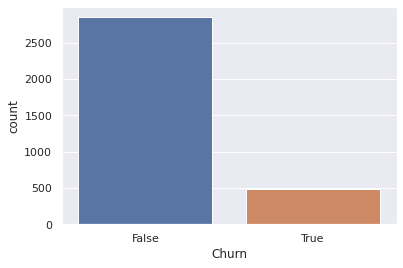

In [ ]:
sns.countplot("Churn", data = df)

Oh my god!! Mr Churn had a mouthful to say... I had to beep half of it!!
Almost 15% of the customers have churned!! WHAT WERE YOU GUYS THINKING??????

Okok calm down now... let me see what i can do

In [ ]:
df['Churn'] = df["Churn"].replace({True:1,False:0})
df['Voice_mail_plan'] = df['Voice_mail_plan'].replace({"Yes":1,"No":0})

In [ ]:
df["Churn"].unique()

array([0, 1])

## Let's go a little bit deep into Mr Churn's love life... maybe we could blackmail him or something ;)

In [ ]:
churned_df = df[df['Churn']==1]
retention_df = df[df['Churn']==0]

Okay mr Churn let's see if there's anything cooking between you and ms State

In [ ]:
#State vs Churn
State_data = pd.crosstab(df["State"],df["Churn"])
State_data['Percentage_Churn'] = State_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)

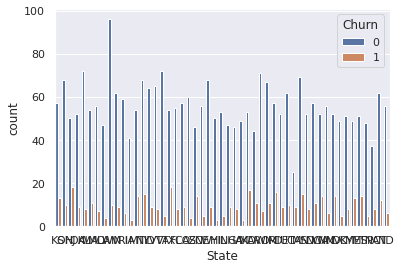

In [ ]:
sns.countplot(x='State',hue="Churn",data = df)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


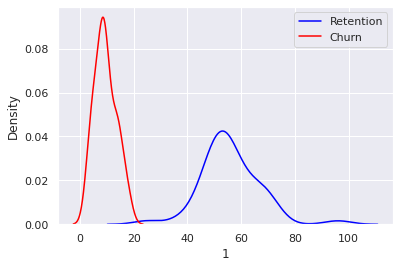

In [ ]:
sns.distplot(State_data[0],color='blue',hist=False,label="Retention")
sns.distplot(State_data[1],color='red',hist=False,label="Churn")
plt.legend()

In [ ]:
State_data

Churn,0,1,Percentage_Churn
State,,,
AK,49,3,5.769231
AL,72,8,10.000000
AR,44,11,20.000000
AZ,60,4,6.250000
CA,25,9,26.470588
CO,57,9,13.636364
CT,62,12,16.216216
DC,49,5,9.259259
DE,52,9,14.754098


Nope! Seems like they're just friends who occationally fight! Moving on,Aahh! ms AL...aka Account length

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


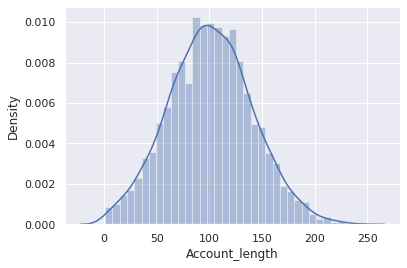

In [ ]:
#Account length vs Churn
sns.distplot(df['Account_length'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level f

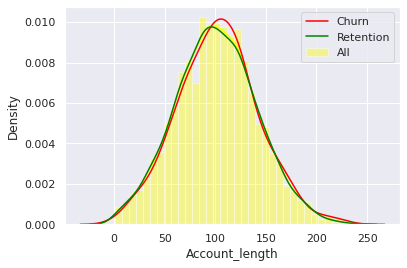

In [ ]:
sns.distplot(df['Account_length'],color = 'yellow',label="All")
sns.distplot(churned_df['Account_length'],color = "red",hist=False,label="Churn")
sns.distplot(retention_df['Account_length'],color = 'green',hist= False,label="Retention")
plt.legend()

Weird... There's Nothing going on here too *gets a little nervous* maybe i'm not that good of a detective afterall! Please ms Area Code....Give me something!!!

In [ ]:
#Area code vs Churn
Area_code_data = pd.crosstab(df["Area_code"],df["Churn"])
Area_code_data['Percentage_Churn'] = Area_code_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)

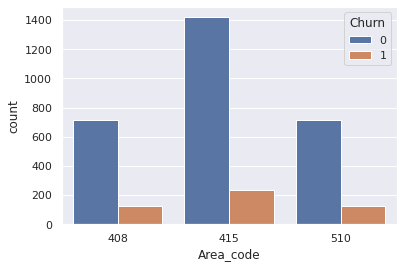

In [ ]:
sns.countplot(x='Area_code',hue="Churn",data = df)

In [ ]:
Area_code_data

Churn,0,1,Percentage_Churn
Area_code,,,
408,716,122,14.558473
415,1419,236,14.259819
510,715,125,14.880952


AAARRRRRRGGGGHHHHH!!!!!! NOthing...Absolutely nothing... no progress.Should i quit?? Okay one last try!Come on ms International Plan, Give me something!!! pleeeaassseeeee... 

In [ ]:
#International Plan vs Churn
df["International_plan"].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df['International_plan'] = df['International_plan'].replace({"Yes":1,"No":0})

In [ ]:
df["International_plan"].unique()

array([0, 1])

hmmmmm.....Okay i might be on to something here

In [ ]:
International_plan_data = pd.crosstab(df["International_plan"],df["Churn"])
International_plan_data['Percentage_Churn'] = International_plan_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)

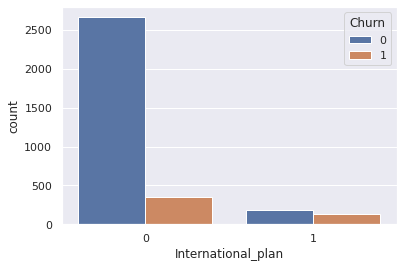

In [ ]:
sns.countplot(x='International_plan',hue="Churn",data = df)

In [ ]:
International_plan_data

Churn,0,1,Percentage_Churn
International_plan,,,
0,2664,346,11.495017
1,186,137,42.414861


OHH....OOOOHHHHHHHHHHH!!!! So This is what he has been upto!! MR CHURN you cheeky boy!<br>
So basically the people who bought International plans and churning in big numbers!! Probably because of connectivity issues or high call charge.

I think ms IP isn't the only affair... ms Vmail Plan steps in to the show!

In [ ]:
#Voice Mail Plan vs Churn
df["Voice_mail_plan"].unique()

array([1, 0])

In [ ]:
df["Voice_mail_plan"].unique()

array([1, 0])

In [ ]:
Voice_mail_plan_data = pd.crosstab(df["Voice_mail_plan"],df["Churn"])
Voice_mail_plan_data['Percentage_Churn'] = Voice_mail_plan_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)

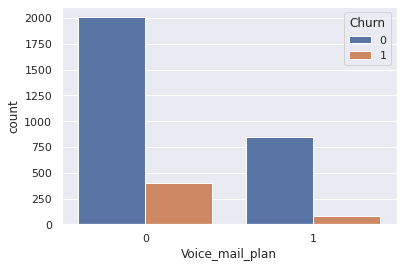

In [ ]:
sns.countplot(x='Voice_mail_plan',hue="Churn",data = df)

In [ ]:
Voice_mail_plan_data

Churn,0,1,Percentage_Churn
Voice_mail_plan,,,
0,2008,403,16.715056
1,842,80,8.676790


 Nothing very interesting about this lady...Next!

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


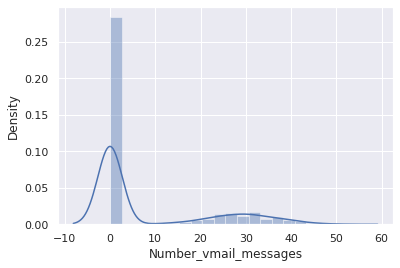

In [ ]:
# Number_vmail_messages vs Churn
sns.distplot(df['Number_vmail_messages'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level f

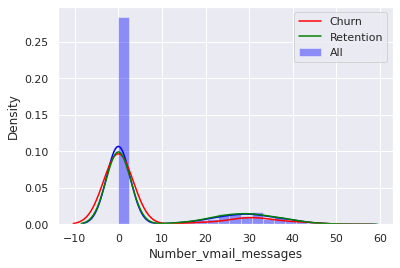

In [ ]:
sns.distplot(df['Number_vmail_messages'],color = 'blue',label="All")
sns.distplot(churned_df['Number_vmail_messages'],color = "red",hist=False,label="Churn")
sns.distplot(retention_df['Number_vmail_messages'],color = 'green',hist= False,label="Retention")
plt.legend()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


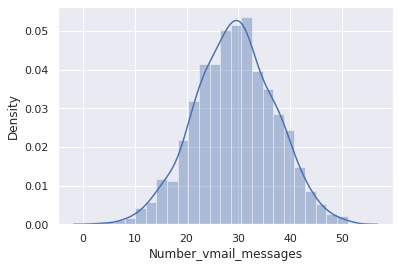

In [ ]:
sns.distplot(df[df["Voice_mail_plan"]==1]['Number_vmail_messages'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level f

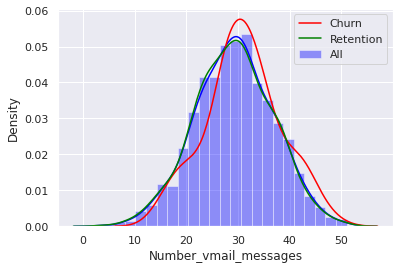

In [ ]:
sns.distplot(df[df["Voice_mail_plan"]==1]['Number_vmail_messages'],color = 'blue',label="All")
sns.distplot(churned_df[churned_df['Voice_mail_plan']==1]['Number_vmail_messages'],color = "red",hist=False,label="Churn")
sns.distplot(retention_df[retention_df['Voice_mail_plan']==1]['Number_vmail_messages'],color = "green",hist=False,label="Retention")
plt.legend()

In [ ]:
df.head(1)

,State,Account_length,Area_code,International_plan,Voice_mail_plan,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0


 Let me just access Mr Churn's call records to check how much money he's Shelling

In [ ]:
#Call vs Churn 
day_cpm = df['Total_day_charge'].mean()/df['Total_day_minutes'].mean()
eve_cpm = df['Total_eve_charge'].mean()/df['Total_eve_minutes'].mean()
night_cpm = df['Total_night_charge'].mean()/df['Total_night_minutes'].mean()
int_cpm = df['Total_intl_charge'].mean()/df['Total_intl_minutes'].mean()

In [ ]:
print([day_cpm,eve_cpm,night_cpm,int_cpm])

[0.1700030073913066, 0.08500104871485774, 0.04500041448440013, 0.2700500279887098]


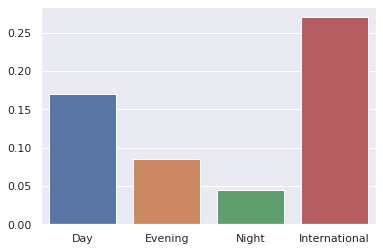

In [ ]:
sns.barplot(x=['Day','Evening','Night','International'],y=[day_cpm,eve_cpm,night_cpm,int_cpm])

As expected His international love tops the chart with the highest charge.. But wait why is he talking so much to the customer care? Something's fishy..Let me check it out!

In [ ]:
#Customer service calls vs Churn
Customer_service_calls_data = pd.crosstab(df['Customer_service_calls'],df["Churn"])
Customer_service_calls_data['Percentage_Churn'] = Customer_service_calls_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)

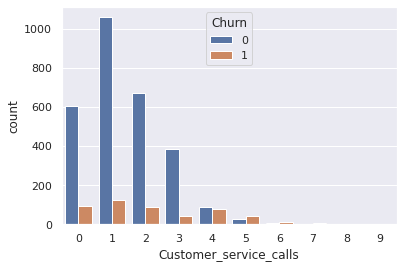

In [ ]:
sns.countplot(x='Customer_service_calls',hue="Churn",data = df)

In [ ]:
Customer_service_calls_data

Churn,0,1,Percentage_Churn
Customer_service_calls,,,
0,605,92,13.199426
1,1059,122,10.330229
2,672,87,11.462451
3,385,44,10.256410
4,90,76,45.783133
5,26,40,60.606061
6,8,14,63.636364
7,4,5,55.555556
8,1,1,50.000000


OHH MY GODDD!!! I can't believe this!!! Mr Churn even flirts with the Customer service! This is too much<br>
It is observed that mostly because of bad customer service, people tend to leave the service.

In [ ]:
df.head(0)

,State,Account_length,Area_code,International_plan,Voice_mail_plan,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn


What is this understanding between State and Area code? This love triangle has gone to the next level!!

In [ ]:
df['State_Arcode'] = df.apply(lambda x : x['State']+ str(x['Area_code']),axis = 1)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


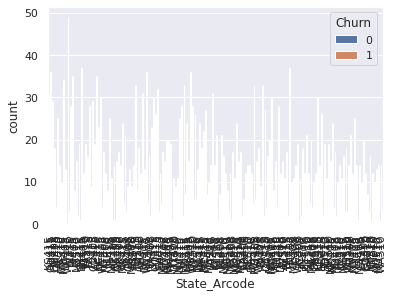

In [ ]:
g=sns.countplot(df['State_Arcode'],hue = df['Churn'])
a=g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [ ]:
State_Arcode_data = pd.crosstab(df['State_Arcode'],df["Churn"])


In [ ]:
State_Arcode_data['Percentage_Churn'] = State_Arcode_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)


In [ ]:

State_Arcode_data[State_Arcode_data['Percentage_Churn']>40]

Churn,0,1,Percentage_Churn
State_Arcode,,,
MD408,9,7,43.750000
MI408,5,7,58.333333


Seems like Churn had a sweet spot for a particular area code in two different States 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Distribution of Percentage of people who left to that of the combination of State+Area code')]

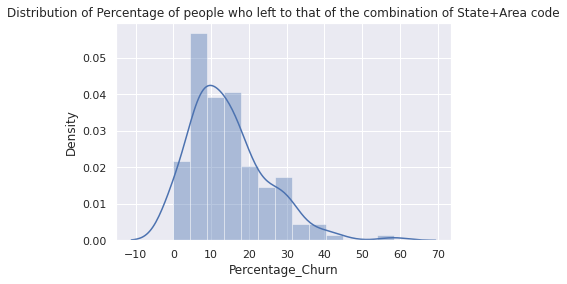

In [ ]:
sns.distplot(State_Arcode_data['Percentage_Churn']).set(title='Distribution of Percentage of people who left to that of the combination of State+Area code')
# ax.title = 'Distribution of Percentage of people who left to that of the combination of State+Area code'

So this is what i'll do..I'll make it simple for mrs Churn to understand about her husband's love life!<br> For Bad customer service, if the churn rate is higher than 3 it is considered as bad service.

In [ ]:
def isbad(x):
  if x>3:
    return 1
  return 0

In [ ]:
df['Bad_customer_service'] = df['Customer_service_calls'].apply(isbad)

In [ ]:
df.head()

,State,Account_length,Area_code,International_plan,Voice_mail_plan,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn,State_Arcode,Bad_customer_service
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,KS415,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,OH415,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,NJ415,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,OH408,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,OK415,0


Analyzing Bad Service

In [ ]:
Bad_customer_service_data = pd.crosstab(df["Bad_customer_service"],df["Churn"])
Bad_customer_service_data['Percentage_Churn'] = Bad_customer_service_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)

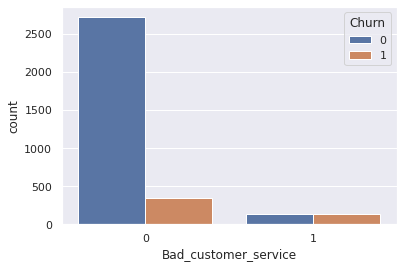

In [ ]:
sns.countplot(x='Bad_customer_service',hue="Churn",data = df)

In [ ]:
Bad_customer_service_data

Churn,0,1,Percentage_Churn
Bad_customer_service,,,
0,2721,345,11.252446
1,129,138,51.685393


We can make a composite column for international calls and bad customer service and check the churn rate for that column

In [ ]:
df['Composite_factors'] = df['International_plan'] + df["Bad_customer_service"]

In [ ]:
df.head()

,State,Account_length,Area_code,International_plan,Voice_mail_plan,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn,State_Arcode,Bad_customer_service,Composite_factors
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,KS415,0,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,OH415,0,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,NJ415,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,OH408,0,1
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,OK415,0,1


In [ ]:
df['Composite_factors'].unique()

array([0, 1, 2])

I know That Mrs Churn can read well...Sooooo....
Here's The data:<br>
0: Customer doesnt have International plan and bad service..So no role of Mr Churn here <br>
1: Customer either has an international plan or a bad service hence chances of Mr Churn sneaking in is high<br>
2: Customer has both International plan and bad service hence there are all the possiblities that you will find Mr Churn in this Bar!!

Go catch him Mrs Churn!!!!

In [ ]:
Composite_factors_data = pd.crosstab(df["Composite_factors"],df["Churn"])
Composite_factors_data['Percentage_Churn'] = Composite_factors_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)

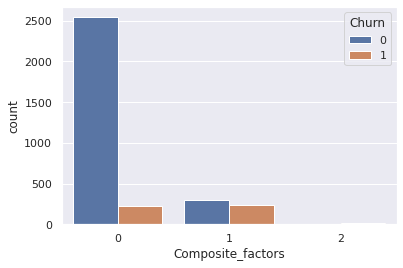

In [ ]:
sns.countplot(x='Composite_factors',hue="Churn",data = df)

In [ ]:
Composite_factors_data

Churn,0,1,Percentage_Churn
Composite_factors,,,
0,2544,227,8.191988
1,297,237,44.382022
2,9,19,67.857143


# **Conclusion:**

 Okay so this is what we have incurred from this data:



1.  The churn rate is higher when customer has International_plan
2.  The churn rate is lower when customer has Voice_mail_plan
3.  International Call charges are higher as compared to other call charges.
4.  Number of Customer Service calls is directly proportional to the churn rate.




We can say that international plans are higher, therefor customers with international Plan Leave

**Having International plan negatively, affects retention**

For customer service calls greater than a number of specific calls, the churn rate drastically increase.
So if the Customer service calls are greater than 3, the people tend to churn.

# **Recommendations:**

Here are few recommendations on the basis of our basic analysis:

*   Telecom service can consider revising there international plans , like providing free incoming calls or reducing price.

*   Improvement is required in customer service support. We should work on solving issues related to every customer , and try to gain customer satisfaction .

*   Few state and area code having higher churn rate, we should try giving better offers to existing customer, and better support so they will not churn.


